# Exam

## Imports and Utility Methods

In [16]:
import math
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

def t_confint(series: pd.Series, alpha: float = 0.05):
    n = series.size
    return stats.t.interval(1 - alpha, # confidence
                        # degrees of freedom = sample size minus One
                            df = n - 1,
                            loc = series.mean(),
                        # std. deviation by square root of sample size
                            scale = series.std() / math.sqrt(n)
                            )

## Student's Results of Task 1

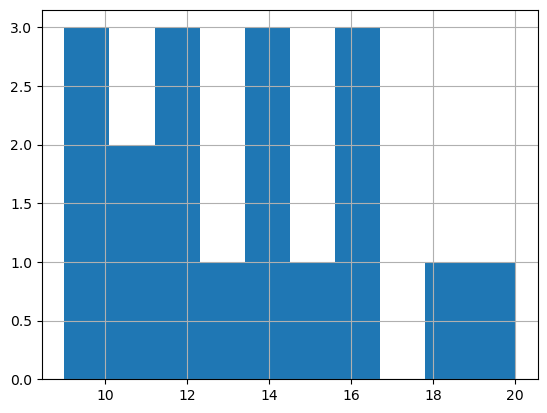

In [17]:
df = pd.Series([11, 11, 15, 12, 12, 12, 16, 16, 16, 14, 14, 18, 14, 13, 9, 9, 20, 10])
df.hist(); None

## Task 2 (25 points)

The CO2 data frame has 84 rows of data from an experiment on the cold tolerance of the grass species *Echinochloa crus-galli*.
Load the data from the provided file like this:

In [18]:
df = pd.read_csv('../data/dataset-23612.csv')
df.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


Determine
* the absolute frequencies
* the relative frequencies
* the cumulative relative frequencies

In [19]:
bins = [0, 10, 20, 30, 40, 50]
freq = pd.DataFrame()
freq['abs'] = df['uptake'].value_counts(bins=bins)
freq['rel'] = df['uptake'].value_counts(bins=bins, normalize=True)
freq = freq.sort_index()
freq['rel_cumsum'] = freq['rel'].cumsum()
freq

,abs,rel,rel_cumsum
"(-0.001, 10.0]",2,0.023810,0.023810
"(10.0, 20.0]",28,0.333333,0.357143
"(20.0, 30.0]",14,0.166667,0.523810
"(30.0, 40.0]",29,0.345238,0.869048
"(40.0, 50.0]",11,0.130952,1.000000


Calculate
* the mean
* the median
* the 30% quantile
* the variance
* the standard deviation
* the coefficient of variation

In [20]:
mean = df['uptake'].mean()
median = df['uptake'].median()
p30 = df['uptake'].quantile(.3)
var = df['uptake'].var()
std = df['uptake'].std()
cov = std / mean
mean, median, p30, var, std, cov

(27.213095238095246,
 28.3,
 18.9,
 116.95151319563968,
 10.814412290810798,
 0.3973973631515407)

Determine the 95% confidence interval:

In [21]:
t_confint(df['uptake'])

(24.866223901709283, 29.55996657448121)

## Task 3

In [22]:
df = pd.DataFrame(stats.norm.rvs(loc=2.06, scale=0.14, size=20, random_state=7))
df.head()

,0
0,2.296674
1,1.994769
2,2.064595
3,2.117052
4,1.949551


In [23]:
stat, pval = stats.ttest_1samp(df[0], popmean=2.0, alternative='greater')
pval

0.05227227710281014

## Task 4 (15 points)

In [24]:
stat, pval = proportions_ztest(count=[22, 29], nobs=[40, 42])
pval

0.18976020932219406

## Task 5 (15 points)

In [25]:
df = pd.DataFrame({
    'indoor': stats.norm.rvs(loc=40, scale=0.8, size=40, random_state=123),
    'outdoor': stats.norm.rvs(loc=40, scale=1, size=40, random_state=321)
})
df.head()

,indoor,outdoor
0,39.131496,40.172519
1,40.797876,41.635483
2,40.226383,40.037336
3,38.794964,39.115850
4,39.537120,38.856808


In [26]:
stat, pval = stats.ttest_rel(df['indoor'], df['outdoor'])
pval

0.5142403268785792